In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('archive/dataset_thyroid_sick.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [113]:
df = df.replace('?',np.nan)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [115]:
del df['TBG']

In [116]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
TBG_measured                   0
referral_source                0
Class                          0
dtype: int64

In [117]:
df = df.dropna()

In [118]:
df[['TSH','T3','TT4','T4U','FTI']]=df[['TSH','T3','TT4','T4U','FTI']].astype(float)

In [119]:
df['age']=df['age'].astype(int)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int32  
 1   sex                        2643 non-null   object 
 2   on_thyroxine               2643 non-null   object 
 3   query_on_thyroxine         2643 non-null   object 
 4   on_antithyroid_medication  2643 non-null   object 
 5   sick                       2643 non-null   object 
 6   pregnant                   2643 non-null   object 
 7   thyroid_surgery            2643 non-null   object 
 8   I131_treatment             2643 non-null   object 
 9   query_hypothyroid          2643 non-null   object 
 10  query_hyperthyroid         2643 non-null   object 
 11  lithium                    2643 non-null   object 
 12  goitre                     2643 non-null   object 
 13  tumor                      2643 non-null   object 
 1

In [121]:
df['on_thyroxine'].value_counts()

on_thyroxine
f    2377
t     266
Name: count, dtype: int64

In [122]:
df['referral_source'].value_counts()

referral_source
other    1237
SVI       929
SVHC      359
STMW       84
SVHD       34
Name: count, dtype: int64

In [123]:
df.replace({'f': 0, 't': 1}, inplace=True)

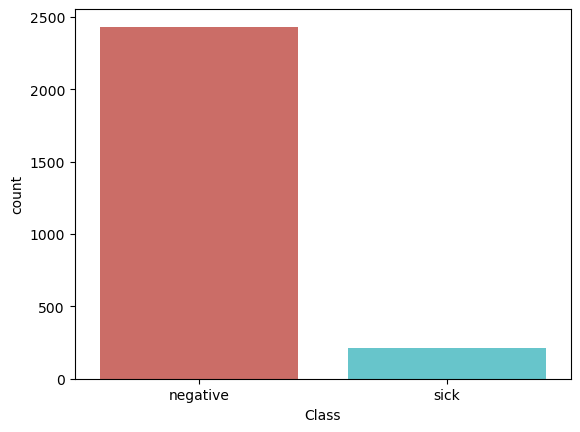

In [124]:
sns.countplot(x='Class',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

In [125]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['referral_source']= label_encoder.fit_transform(df['referral_source']) 
df['Class']= label_encoder.fit_transform(df['Class']) 

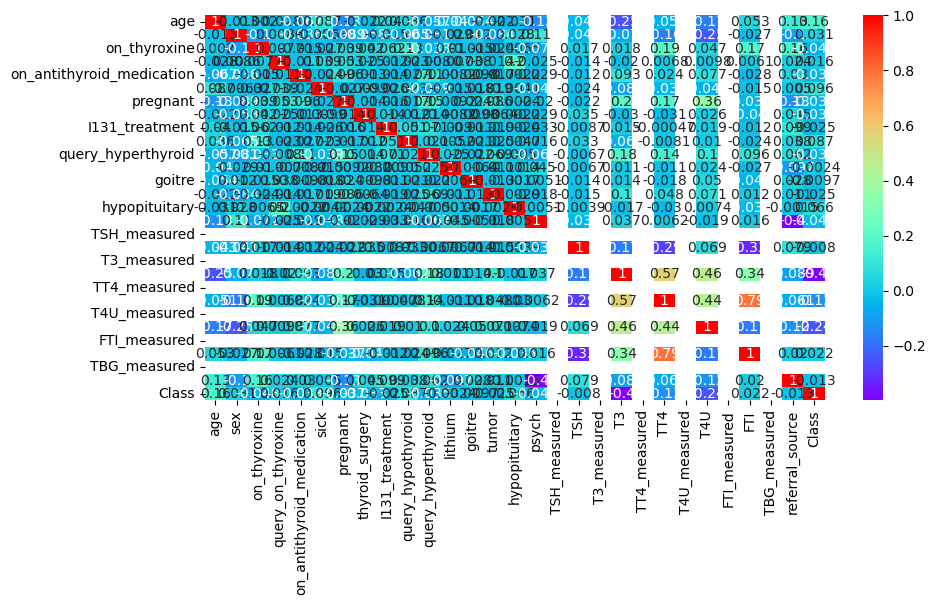

In [126]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [127]:
df.to_csv('processed.csv')

In [128]:
X = df.drop(["Class"],axis =1)
y = df["Class"]

# All Features

In [129]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2114, 28), (2114,), (529, 28), (529,))

# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])


In [133]:
storeResults('All-FS RF',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# DecisionTree


In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [135]:
storeResults('All-FS DT',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc)

# Gradient Boosting

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

gbm.fit(X_train, y_train)
y_pred    = gbm.predict(X_valid)

gbm_acc = accuracy_score(y_pred, y_valid)
gbm_prec = precision_score(y_pred, y_valid,average='weighted')
gbm_f1 = f1_score(y_pred, y_valid,average='weighted')
gbm_auroc = roc_auc_score(y_train, gbm.predict_proba(X_train)[:, 1])
gbm_rec = recall_score(y_pred, y_valid,average='weighted')

In [137]:
storeResults('All-FS GB',gbm_acc,gbm_prec,gbm_rec,gbm_f1,gbm_auroc)

# AdaBoost

In [138]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)
y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])
ada_rec = recall_score(y_pred, y_valid,average='weighted')

In [139]:
storeResults('All-FS AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# 3SHC

# First SHC

In [140]:
from sklearn.ensemble import VotingClassifier

fshc = VotingClassifier(estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)], voting='soft')
fshc.fit(X_train, y_train)
y_pred    = fshc.predict(X_valid)

fshc_acc = accuracy_score(y_pred, y_valid)
fshc_prec = precision_score(y_pred, y_valid,average='weighted')
fshc_f1 = f1_score(y_pred, y_valid,average='weighted')
fshc_auroc = roc_auc_score(y_train, fshc.predict_proba(X_train)[:, 1])
fshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [141]:
storeResults('All-FS FirstSHC',fshc_acc,fshc_prec,fshc_rec,fshc_f1,fshc_auroc)

# Second SHC

In [142]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sshc = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
sshc.fit(X_train, y_train)
y_pred    = sshc.predict(X_valid)

sshc_acc = accuracy_score(y_pred, y_valid)
sshc_prec = precision_score(y_pred, y_valid,average='weighted')
sshc_f1 = f1_score(y_pred, y_valid,average='weighted')
sshc_auroc = roc_auc_score(y_train, sshc.predict_proba(X_train)[:, 1])
sshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [143]:
storeResults('All-FS SecondSHC',sshc_acc,sshc_prec,sshc_rec,sshc_f1,sshc_auroc)

# Third SHC

In [144]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

In [145]:
estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)]

tsch = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

tsch.fit(X_train, y_train)
y_pred    = tsch.predict(X_valid)

tsch_acc = accuracy_score(y_pred, y_valid)
tsch_prec = precision_score(y_pred, y_valid,average='weighted')
tsch_f1 = f1_score(y_pred, y_valid,average='weighted')
tsch_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
tsch_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 163, number of negative: 1951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077105 -> initscore=-2.482347
[LightGBM] [Info] Start training from score -2.482347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [146]:
storeResults('All-FS ThridSHC',tsch_acc,tsch_prec,tsch_rec,tsch_f1,tsch_auroc)

# 3SHANN

In [147]:
from keras.models import Sequential
from keras.layers import Dense

In [148]:
ann = Sequential()
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 28))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [149]:
ann.fit(X_train, y_train, batch_size = 2, epochs = 10,verbose = 0)

In [150]:
y_pred = ann.predict(X_valid)
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_pred, y_valid)
ann_prec = precision_score(y_pred, y_valid,average='weighted')
ann_f1 = f1_score(y_pred, y_valid,average='weighted')
ann_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
ann_rec = recall_score(y_pred, y_valid,average='weighted')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [151]:
storeResults('All-FS ThridSHC',ann_acc,ann_prec,ann_rec,ann_f1,ann_auroc)

# Extension

In [152]:
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators=[('ET', tree),('BoostedDT', bdt)], voting='soft')

In [153]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')
ext_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
ext_rec = recall_score(y_pred, y_valid,average='weighted')

In [154]:
storeResults('All-FS EXTENSION',ext_acc,ext_prec,ext_rec,ext_f1,ext_auroc)

# Comparison

In [155]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'F1_score' : f1score,
                       'AUC' : auc,
                       'Recall' : recall
                      }) 

In [156]:
result

,ML Model,Accuracy,Precision,F1_score,AUC,Recall
0,All-FS RF,0.975,0.978,0.976,1.000,0.975
1,All-FS DT,0.977,0.978,0.978,1.000,0.977
2,All-FS GB,0.970,0.969,0.969,0.921,0.970
3,All-FS AdaBoost,0.974,0.976,0.974,0.997,0.974
4,All-FS FirstSHC,0.983,0.983,0.983,1.000,0.983
5,All-FS SecondSHC,0.970,0.972,0.971,1.000,0.970
6,All-FS ThridSHC,0.983,0.984,0.983,1.000,0.983
7,All-FS ThridSHC,0.932,0.970,0.946,1.000,0.932
8,All-FS EXTENSION,0.953,0.969,0.958,1.000,0.953


# Modelling

In [157]:
import joblib
filename = 'models/model_allfs.sav'
joblib.dump(model, filename)

['models/model_allfs.sav']

# Graph

In [49]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

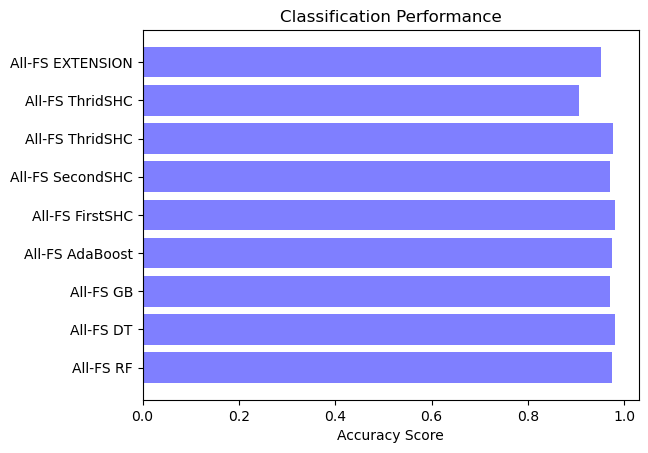

In [50]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

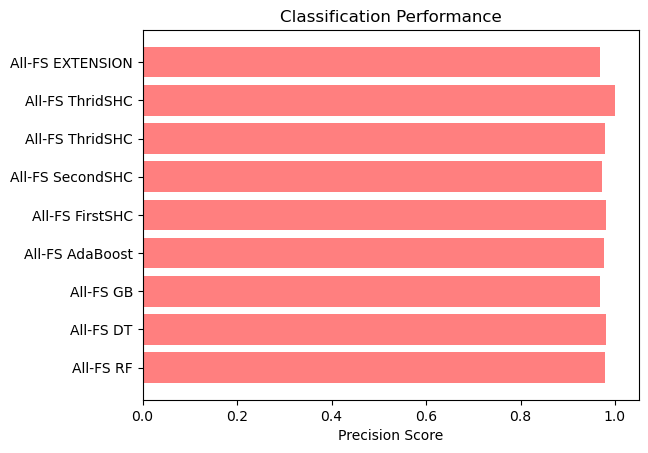

In [51]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

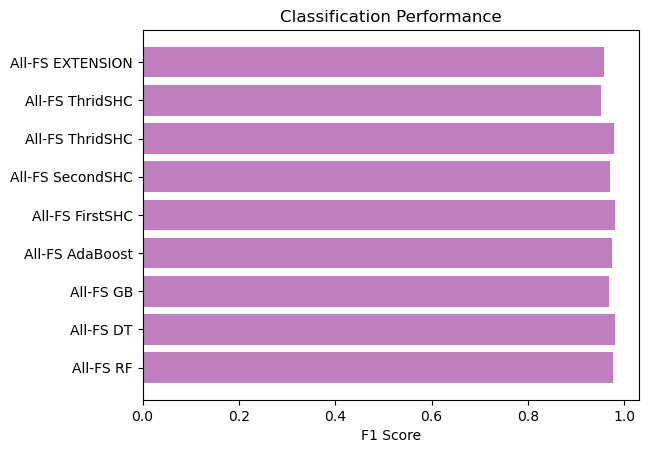

In [52]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

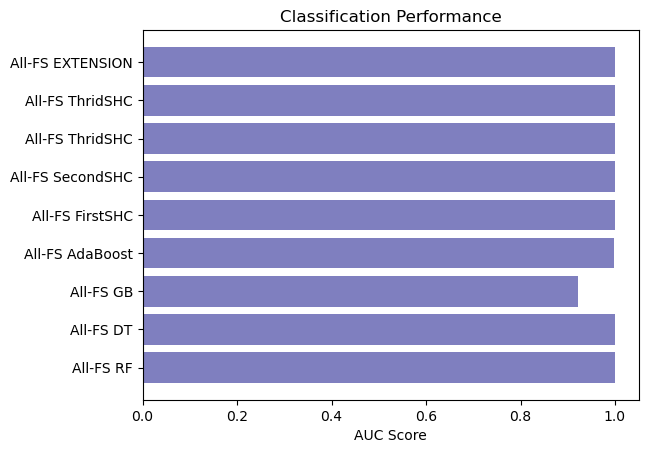

In [53]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

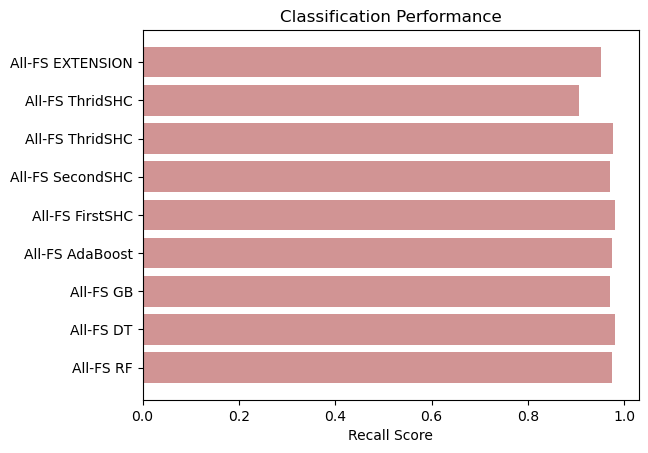

In [54]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# LasFS

In [55]:
df = pd.read_csv('processed.csv')
del df['Unnamed: 0']
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,1,0
1,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,3,0
2,80,0,0,0,0,0,0,0,0,0,...,0.6,1,80.0,1,0.70,1,115.0,0,3,1
3,66,0,0,0,0,0,0,0,0,0,...,2.2,1,123.0,1,0.93,1,132.0,0,3,0
4,68,1,0,0,0,0,0,0,0,0,...,1.6,1,83.0,1,0.89,1,93.0,0,3,0


In [56]:
from sklearn.linear_model import Lasso

In [57]:
X = df.drop(["Class"],axis =1)
y = df["Class"]

In [58]:
names=df.drop("Class", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['age' 'sex' 'on_thyroxine' 'query_on_thyroxine'
 'on_antithyroid_medication' 'sick' 'pregnant' 'thyroid_surgery'
 'I131_treatment' 'query_hypothyroid' 'query_hyperthyroid' 'lithium'
 'goitre' 'tumor' 'hypopituitary' 'psych' 'TSH_measured' 'TSH'
 'T3_measured' 'T3' 'TT4_measured' 'TT4' 'T4U_measured' 'T4U'
 'FTI_measured' 'FTI' 'TBG_measured' 'referral_source']


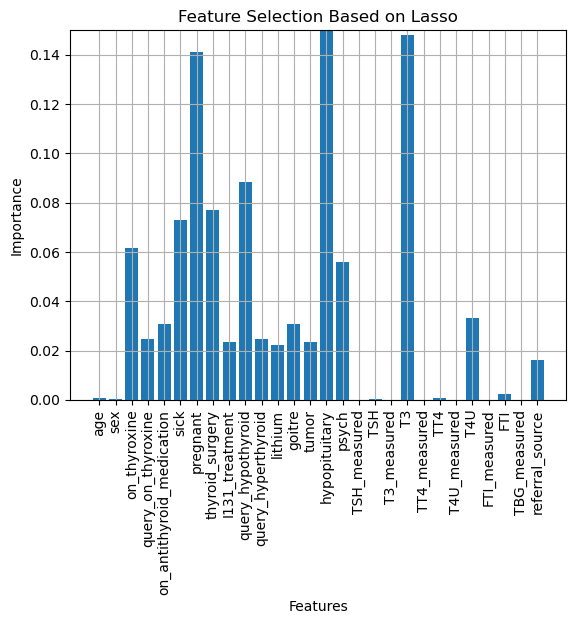

In [59]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [60]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "Class")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['on_thyroxine' 'query_on_thyroxine' 'on_antithyroid_medication' 'sick'
 'pregnant' 'thyroid_surgery' 'I131_treatment' 'query_hypothyroid'
 'query_hyperthyroid' 'lithium' 'goitre' 'tumor' 'hypopituitary' 'psych'
 'T3' 'T4U' 'FTI' 'referral_source']
Selected Columns: ['on_thyroxine' 'query_on_thyroxine' 'on_antithyroid_medication' 'sick'
 'pregnant' 'thyroid_surgery' 'I131_treatment' 'query_hypothyroid'
 'query_hyperthyroid' 'lithium' 'goitre' 'tumor' 'hypopituitary' 'psych'
 'T3' 'T4U' 'FTI' 'referral_source' 'Class']


In [61]:
X = df[['on_thyroxine','query_on_thyroxine', 'on_antithyroid_medication', 'sick',
 'pregnant' ,'thyroid_surgery' ,'I131_treatment', 'query_hypothyroid',
 'query_hyperthyroid' ,'lithium' ,'goitre' ,'tumor' ,'hypopituitary' ,'psych',
 'T3', 'T4U' ,'FTI' ,'referral_source']]
y = df["Class"]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2114, 18), (2114,), (529, 18), (529,))

In [63]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

# Random FOrest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

In [65]:
storeResults('LAS-FS RF',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# DecisionTree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [67]:
storeResults('LAS-FS DT',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc)

# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

gbm.fit(X_train, y_train)
y_pred    = gbm.predict(X_valid)

gbm_acc = accuracy_score(y_pred, y_valid)
gbm_prec = precision_score(y_pred, y_valid,average='weighted')
gbm_f1 = f1_score(y_pred, y_valid,average='weighted')
gbm_auroc = roc_auc_score(y_train, gbm.predict_proba(X_train)[:, 1])
gbm_rec = recall_score(y_pred, y_valid,average='weighted')

In [69]:
storeResults('LAS-FS GB',gbm_acc,gbm_prec,gbm_rec,gbm_f1,gbm_auroc)

# AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)
y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])
ada_rec = recall_score(y_pred, y_valid,average='weighted')

In [71]:
storeResults('LAS-FS AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# 3SHC

# First SHC

In [72]:
from sklearn.ensemble import VotingClassifier

fshc = VotingClassifier(estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)], voting='soft')
fshc.fit(X_train, y_train)
y_pred    = fshc.predict(X_valid)

fshc_acc = accuracy_score(y_pred, y_valid)
fshc_prec = precision_score(y_pred, y_valid,average='weighted')
fshc_f1 = f1_score(y_pred, y_valid,average='weighted')
fshc_auroc = roc_auc_score(y_train, fshc.predict_proba(X_train)[:, 1])
fshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [73]:
storeResults('LAS-FS FirstSHC',fshc_acc,fshc_prec,fshc_rec,fshc_f1,fshc_auroc)

# Second SHC

In [74]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sshc = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
sshc.fit(X_train, y_train)
y_pred    = sshc.predict(X_valid)

sshc_acc = accuracy_score(y_pred, y_valid)
sshc_prec = precision_score(y_pred, y_valid,average='weighted')
sshc_f1 = f1_score(y_pred, y_valid,average='weighted')
sshc_auroc = roc_auc_score(y_train, sshc.predict_proba(X_train)[:, 1])
sshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [75]:
storeResults('LAS-FS SecondSHC',sshc_acc,sshc_prec,sshc_rec,sshc_f1,sshc_auroc)

# Third SHC

In [76]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)]

tsch = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

tsch.fit(X_train, y_train)
y_pred    = tsch.predict(X_valid)

tsch_acc = accuracy_score(y_pred, y_valid)
tsch_prec = precision_score(y_pred, y_valid,average='weighted')
tsch_f1 = f1_score(y_pred, y_valid,average='weighted')
tsch_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
tsch_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 163, number of negative: 1951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077105 -> initscore=-2.482347
[LightGBM] [Info] Start training from score -2.482347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [77]:
storeResults('LAS-FS ThridSHC',tsch_acc,tsch_prec,tsch_rec,tsch_f1,tsch_auroc)

# 3SHANN

In [78]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
ann.fit(X_train, y_train, batch_size = 2, epochs = 10,verbose = 0)

In [80]:
y_pred = ann.predict(X_valid)
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_pred, y_valid)
ann_prec = precision_score(y_pred, y_valid,average='weighted')
ann_f1 = f1_score(y_pred, y_valid,average='weighted')
ann_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
ann_rec = recall_score(y_pred, y_valid,average='weighted')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [81]:
storeResults('LAS-FS ThridSHC',ann_acc,ann_prec,ann_rec,ann_f1,ann_auroc)

# Extension

In [82]:
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators=[('ET', tree),('BoostedDT', bdt)], voting='soft')

In [83]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')
ext_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
ext_rec = recall_score(y_pred, y_valid,average='weighted')

In [84]:
storeResults('LAS-FS EXTENSION',ext_acc,ext_prec,ext_rec,ext_f1,ext_auroc)

# Comparison

In [85]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'F1_score' : f1score,
                       'AUC' : auc,
                       'Recall' : recall
                      }) 

In [86]:
result

,ML Model,Accuracy,Precision,F1_score,AUC,Recall
0,LAS-FS RF,0.968,0.972,0.969,1.000,0.968
1,LAS-FS DT,0.974,0.976,0.974,1.000,0.974
2,LAS-FS GB,0.957,0.956,0.954,0.927,0.957
3,LAS-FS AdaBoost,0.957,0.958,0.957,0.994,0.957
4,LAS-FS FirstSHC,0.974,0.976,0.974,1.000,0.974
5,LAS-FS SecondSHC,0.966,0.970,0.967,1.000,0.966
6,LAS-FS ThridSHC,0.970,0.976,0.972,1.000,0.970
7,LAS-FS ThridSHC,0.943,0.960,0.949,1.000,0.943
8,LAS-FS EXTENSION,0.964,0.969,0.966,1.000,0.964


# Modelling

In [87]:
import joblib
filename = 'models/model_las.sav'
joblib.dump(model, filename)

['models/model_las.sav']

# Graph

In [88]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

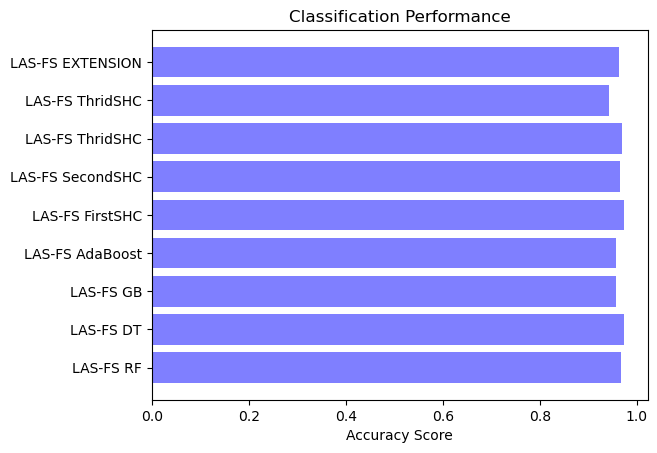

In [89]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

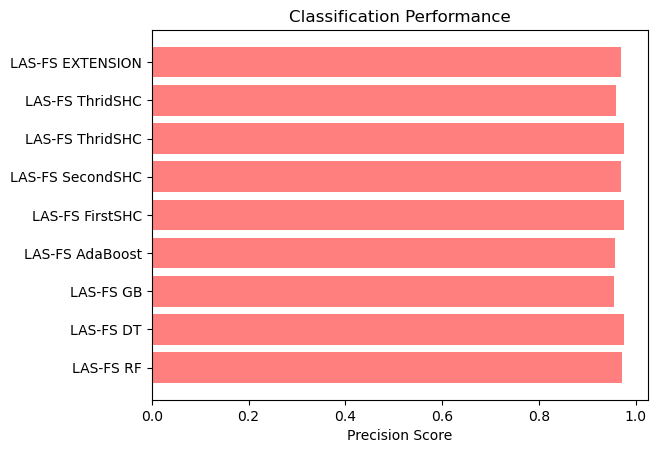

In [90]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

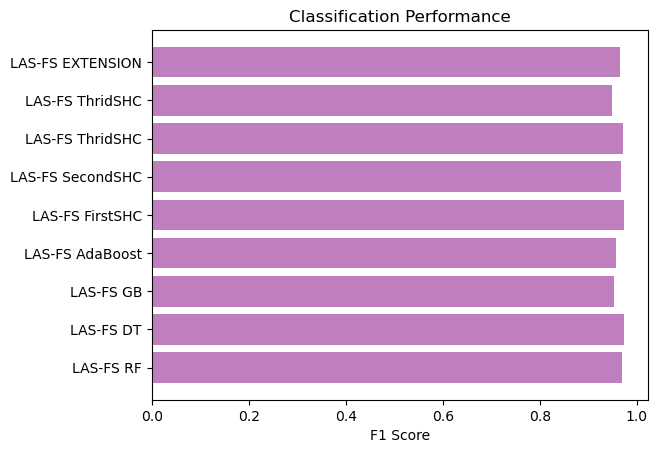

In [91]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

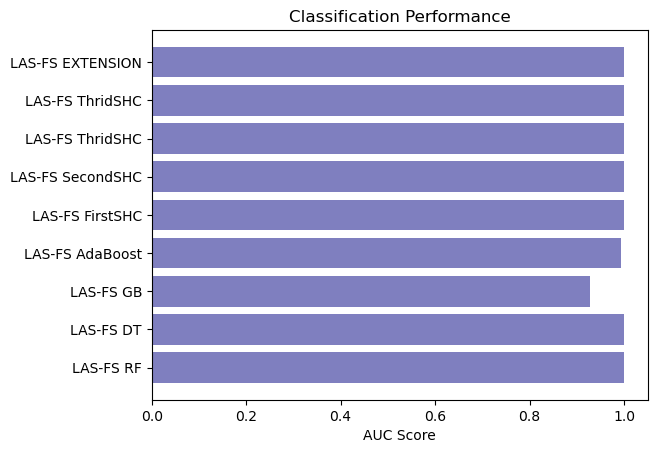

In [92]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

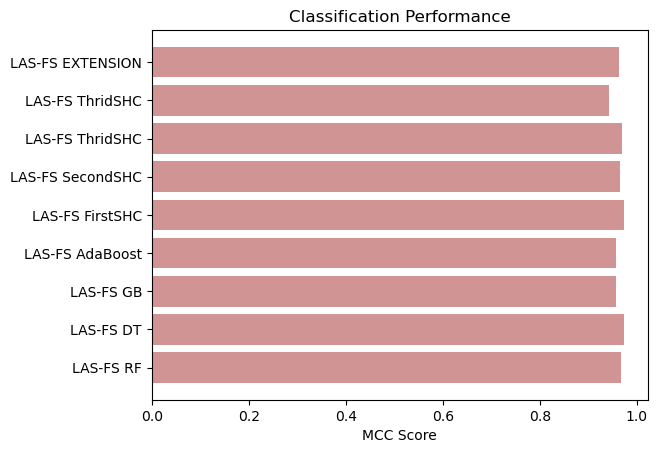

In [93]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

# FIS

In [94]:
df = pd.read_csv('processed.csv')
del df['Unnamed: 0']
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,1,0
1,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,3,0
2,80,0,0,0,0,0,0,0,0,0,...,0.6,1,80.0,1,0.70,1,115.0,0,3,1
3,66,0,0,0,0,0,0,0,0,0,...,2.2,1,123.0,1,0.93,1,132.0,0,3,0
4,68,1,0,0,0,0,0,0,0,0,...,1.6,1,83.0,1,0.89,1,93.0,0,3,0


In [95]:
X = df.drop(["Class"],axis =1)
y = df["Class"]

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [97]:
print(model.feature_importances_) 

[8.04132342e-02 1.84608766e-02 9.39210569e-03 2.28193651e-03
 3.97631265e-04 1.13045592e-02 2.28131623e-04 1.24722258e-03
 1.14528193e-03 1.18951963e-02 6.11428176e-03 2.30460212e-03
 1.38032178e-03 3.58944506e-03 3.17063263e-03 3.86187746e-03
 0.00000000e+00 8.71314075e-02 0.00000000e+00 3.86114942e-01
 0.00000000e+00 9.77773817e-02 0.00000000e+00 1.07382960e-01
 0.00000000e+00 9.84010858e-02 0.00000000e+00 6.60048872e-02]


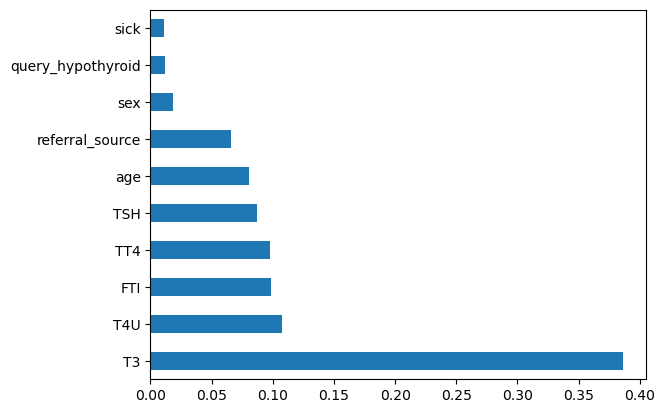

In [98]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [99]:
X = df[['query_on_thyroxine','sick','sex','referral_source', 'age','TSH','TT4' ,'T3', 'T4U' ,'FTI' ]]
y = df["Class"]

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2114, 10), (2114,), (529, 10), (529,))

In [103]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

In [102]:
storeResults('FIS-FS RF',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# DecisionTree

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [104]:
storeResults('FIS-FS DT',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc)

# GradientBoosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

gbm.fit(X_train, y_train)
y_pred    = gbm.predict(X_valid)

gbm_acc = accuracy_score(y_pred, y_valid)
gbm_prec = precision_score(y_pred, y_valid,average='weighted')
gbm_f1 = f1_score(y_pred, y_valid,average='weighted')
gbm_auroc = roc_auc_score(y_train, gbm.predict_proba(X_train)[:, 1])
gbm_rec = recall_score(y_pred, y_valid,average='weighted')

In [106]:
storeResults('FIS-FS GB',gbm_acc,gbm_prec,gbm_rec,gbm_f1,gbm_auroc)

# AdaBoost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)
y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])
ada_rec = recall_score(y_pred, y_valid,average='weighted')

In [111]:
storeResults('FIS-FS AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# 3SHC

# First SHC

In [112]:
from sklearn.ensemble import VotingClassifier

fshc = VotingClassifier(estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)], voting='soft')
fshc.fit(X_train, y_train)
y_pred    = fshc.predict(X_valid)

fshc_acc = accuracy_score(y_pred, y_valid)
fshc_prec = precision_score(y_pred, y_valid,average='weighted')
fshc_f1 = f1_score(y_pred, y_valid,average='weighted')
fshc_auroc = roc_auc_score(y_train, fshc.predict_proba(X_train)[:, 1])
fshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [113]:
storeResults('FIS-FS FirstSHC',fshc_acc,fshc_prec,fshc_rec,fshc_f1,fshc_auroc)

# Second SHC

In [114]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sshc = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
sshc.fit(X_train, y_train)
y_pred    = sshc.predict(X_valid)

sshc_acc = accuracy_score(y_pred, y_valid)
sshc_prec = precision_score(y_pred, y_valid,average='weighted')
sshc_f1 = f1_score(y_pred, y_valid,average='weighted')
sshc_auroc = roc_auc_score(y_train, sshc.predict_proba(X_train)[:, 1])
sshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [115]:
storeResults('FIS-FS SecondSHC',sshc_acc,sshc_prec,sshc_rec,sshc_f1,sshc_auroc)

# Third SHC

In [116]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)]

tsch = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

tsch.fit(X_train, y_train)
y_pred    = tsch.predict(X_valid)

tsch_acc = accuracy_score(y_pred, y_valid)
tsch_prec = precision_score(y_pred, y_valid,average='weighted')
tsch_f1 = f1_score(y_pred, y_valid,average='weighted')
tsch_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
tsch_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 163, number of negative: 1951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077105 -> initscore=-2.482347
[LightGBM] [Info] Start training from score -2.482347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [117]:
storeResults('FIS-FS ThridSHC',tsch_acc,tsch_prec,tsch_rec,tsch_f1,tsch_auroc)

# 3SHANN

In [120]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [121]:
ann.fit(X_train, y_train, batch_size = 2, epochs = 10,verbose = 0)

In [122]:
y_pred = ann.predict(X_valid)
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_pred, y_valid)
ann_prec = precision_score(y_pred, y_valid,average='weighted')
ann_f1 = f1_score(y_pred, y_valid,average='weighted')
ann_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
ann_rec = recall_score(y_pred, y_valid,average='weighted')

17/17 [==============================] - 0s 1ms/step


In [123]:
storeResults('FIS-FS ThridSHC',ann_acc,ann_prec,ann_rec,ann_f1,ann_auroc)

# Extension

In [124]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators=[('ET', tree),('BoostedDT', bdt)], voting='soft')

In [125]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')
ext_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
ext_rec = recall_score(y_pred, y_valid,average='weighted')

In [126]:
storeResults('FIS-FS EXTENSION',ext_acc,ext_prec,ext_rec,ext_f1,ext_auroc)

# Comparison

In [127]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'F1_score' : f1score,
                       'AUC' : auc,
                       'Recall' : recall
                      }) 

In [128]:
result

,ML Model,Accuracy,Precision,F1_score,AUC,Recall
0,FIS-FS RF,0.977,0.979,0.978,1.000,0.977
1,FIS-FS DT,0.981,0.981,0.981,1.000,0.981
2,FIS-FS GB,0.970,0.969,0.969,0.921,0.970
3,FIS-FS AdaBoost,0.970,0.970,0.970,0.997,0.970
4,FIS-FS FirstSHC,0.979,0.980,0.980,1.000,0.979
5,FIS-FS SecondSHC,0.974,0.975,0.974,1.000,0.974
6,FIS-FS ThridSHC,0.979,0.983,0.980,1.000,0.979
7,FIS-FS ThridSHC,0.928,0.963,0.942,1.000,0.928
8,FIS-FS EXTENSION,1.000,1.000,1.000,0.966,1.000


# Modelling

In [129]:
import joblib
filename = 'models/model_fis.sav'
joblib.dump(model, filename)

['models/model_fis.sav']

# Graph

In [131]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

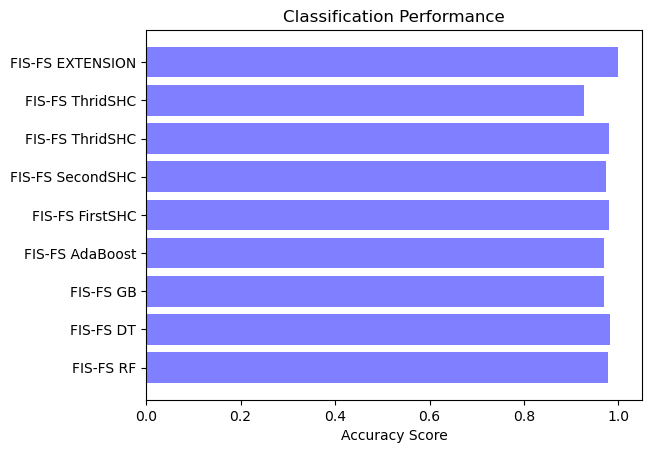

In [132]:
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

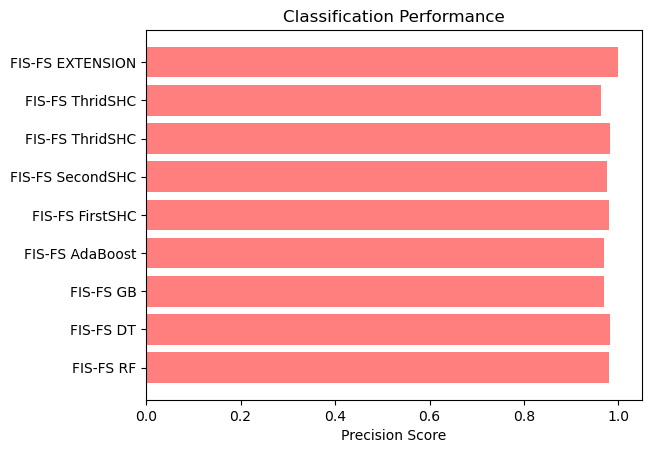

In [133]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

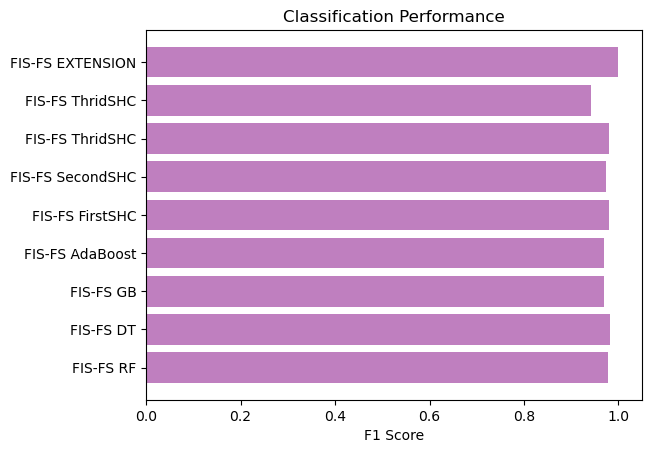

In [134]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

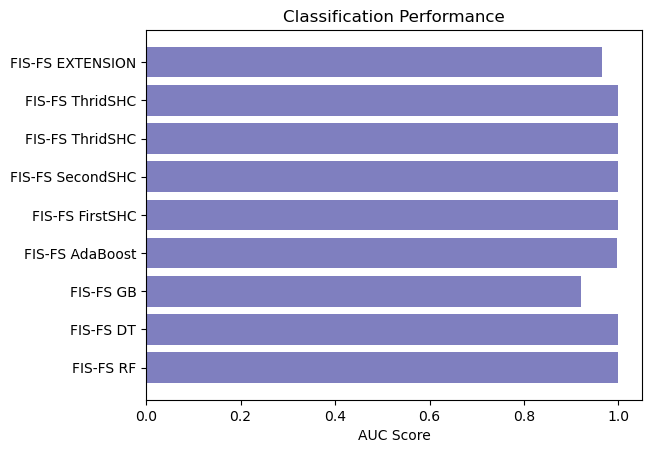

In [135]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

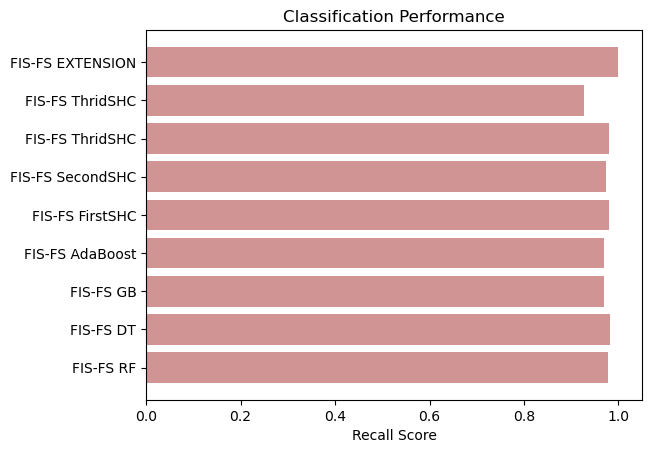

In [136]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# IGS FS

In [137]:
df = pd.read_csv('processed.csv')
del df['Unnamed: 0']
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,1,0
1,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,3,0
2,80,0,0,0,0,0,0,0,0,0,...,0.6,1,80.0,1,0.70,1,115.0,0,3,1
3,66,0,0,0,0,0,0,0,0,0,...,2.2,1,123.0,1,0.93,1,132.0,0,3,0
4,68,1,0,0,0,0,0,0,0,0,...,1.6,1,83.0,1,0.89,1,93.0,0,3,0


In [139]:
X = df.drop(["Class"],axis =1)
y = df["Class"]

In [140]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
# determine the mutual information
mutual_info =  SelectKBest(mutual_info_classif, k=8)
mutual_info.fit(X, y)

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x00000224D4193C70>)

In [141]:
X.columns[mutual_info.get_support()]

Index(['age', 'on_thyroxine', 'on_antithyroid_medication', 'sick', 'T3', 'TT4',
       'T4U', 'referral_source'],
      dtype='object')

In [143]:
X = df[['age', 'on_thyroxine', 'on_antithyroid_medication', 'sick', 'T3', 'TT4',
       'T4U', 'referral_source']]
y = df["Class"]

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2114, 8), (2114,), (529, 8), (529,))

In [145]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

# Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

In [147]:
storeResults('IGS-FS RF',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# DecisionTree

In [148]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [149]:
storeResults('IGS-FS DT',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc)

# GradientBoosting

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

gbm.fit(X_train, y_train)
y_pred    = gbm.predict(X_valid)

gbm_acc = accuracy_score(y_pred, y_valid)
gbm_prec = precision_score(y_pred, y_valid,average='weighted')
gbm_f1 = f1_score(y_pred, y_valid,average='weighted')
gbm_auroc = roc_auc_score(y_train, gbm.predict_proba(X_train)[:, 1])
gbm_rec = recall_score(y_pred, y_valid,average='weighted')

In [151]:
storeResults('IGS-FS GB',gbm_acc,gbm_prec,gbm_rec,gbm_f1,gbm_auroc)

# AdaBoost

In [152]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)
y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])
ada_rec = recall_score(y_pred, y_valid,average='weighted')

In [153]:
storeResults('IGS-FS AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# 3SHC

# First SHC

In [154]:
from sklearn.ensemble import VotingClassifier

fshc = VotingClassifier(estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)], voting='soft')
fshc.fit(X_train, y_train)
y_pred    = fshc.predict(X_valid)

fshc_acc = accuracy_score(y_pred, y_valid)
fshc_prec = precision_score(y_pred, y_valid,average='weighted')
fshc_f1 = f1_score(y_pred, y_valid,average='weighted')
fshc_auroc = roc_auc_score(y_train, fshc.predict_proba(X_train)[:, 1])
fshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [155]:
storeResults('IGS-FS FirstSHC',fshc_acc,fshc_prec,fshc_rec,fshc_f1,fshc_auroc)

# Second SHC

In [156]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sshc = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
sshc.fit(X_train, y_train)
y_pred    = sshc.predict(X_valid)

sshc_acc = accuracy_score(y_pred, y_valid)
sshc_prec = precision_score(y_pred, y_valid,average='weighted')
sshc_f1 = f1_score(y_pred, y_valid,average='weighted')
sshc_auroc = roc_auc_score(y_train, sshc.predict_proba(X_train)[:, 1])
sshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [157]:
storeResults('IGS-FS SecondSHC',sshc_acc,sshc_prec,sshc_rec,sshc_f1,sshc_auroc)

# Third SHC

In [158]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)]

tsch = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

tsch.fit(X_train, y_train)
y_pred    = tsch.predict(X_valid)

tsch_acc = accuracy_score(y_pred, y_valid)
tsch_prec = precision_score(y_pred, y_valid,average='weighted')
tsch_f1 = f1_score(y_pred, y_valid,average='weighted')
tsch_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
tsch_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 163, number of negative: 1951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077105 -> initscore=-2.482347
[LightGBM] [Info] Start training from score -2.482347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [159]:
storeResults('IGS-FS ThirdSHC',tsch_acc,tsch_prec,tsch_rec,tsch_f1,tsch_auroc)

# 3SHANN

In [161]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [162]:
ann.fit(X_train, y_train, batch_size = 2, epochs = 10,verbose = 0)

In [163]:
y_pred = ann.predict(X_valid)
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_pred, y_valid)
ann_prec = precision_score(y_pred, y_valid,average='weighted')
ann_f1 = f1_score(y_pred, y_valid,average='weighted')
ann_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
ann_rec = recall_score(y_pred, y_valid,average='weighted')

17/17 [==============================] - 0s 1ms/step


In [164]:
storeResults('IGS-FS ThridSHC',ann_acc,ann_prec,ann_rec,ann_f1,ann_auroc)

# Extension

In [165]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators=[('ET', tree),('BoostedDT', bdt)], voting='soft')

In [166]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')
ext_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
ext_rec = recall_score(y_pred, y_valid,average='weighted')

In [167]:
storeResults('IGS-FS EXTENSION',ext_acc,ext_prec,ext_rec,ext_f1,ext_auroc)

# Comparison

In [168]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'F1_score' : f1score,
                       'AUC' : auc,
                       'Recall' : recall
                      }) 

In [169]:
result

,ML Model,Accuracy,Precision,F1_score,AUC,Recall
0,IGS-FS RF,0.974,0.976,0.974,1.000,0.974
1,IGS-FS DT,0.972,0.973,0.972,1.000,0.972
2,IGS-FS GB,0.970,0.969,0.969,0.921,0.970
3,IGS-FS AdaBoost,0.964,0.965,0.965,0.994,0.964
4,IGS-FS FirstSHC,0.968,0.969,0.968,1.000,0.968
5,IGS-FS SecondSHC,0.970,0.972,0.971,1.000,0.970
6,IGS-FS ThirdSHC,0.972,0.977,0.973,1.000,0.972
7,IGS-FS ThridSHC,0.907,1.000,0.951,1.000,0.907
8,IGS-FS EXTENSION,1.000,1.000,1.000,0.967,1.000


# Modelling

In [170]:
import joblib
filename = 'models/model_igs.sav'
joblib.dump(model, filename)

['models/model_igs.sav']

# Graph

In [172]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

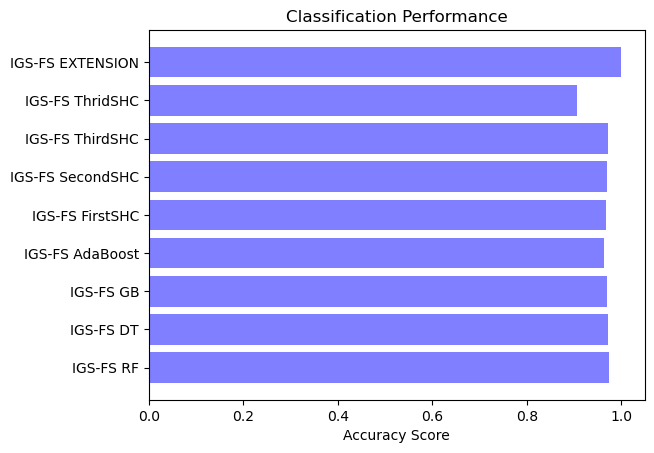

In [173]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

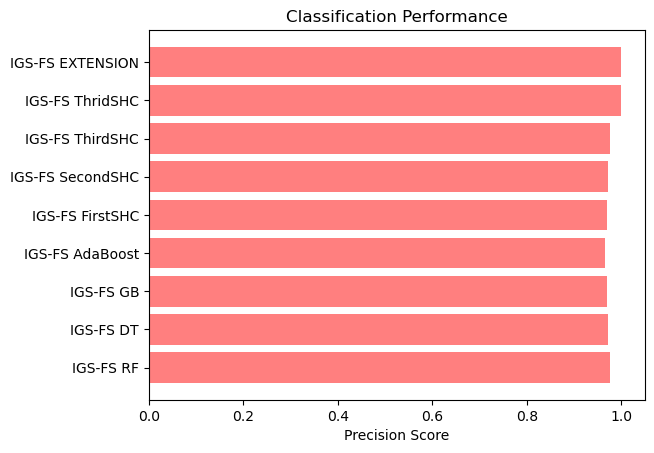

In [174]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

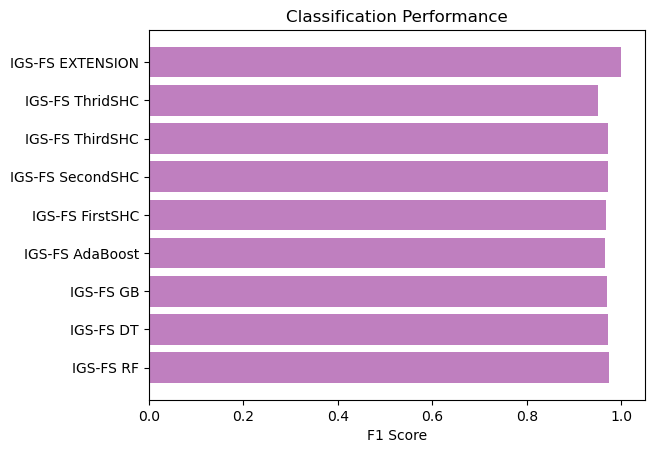

In [175]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

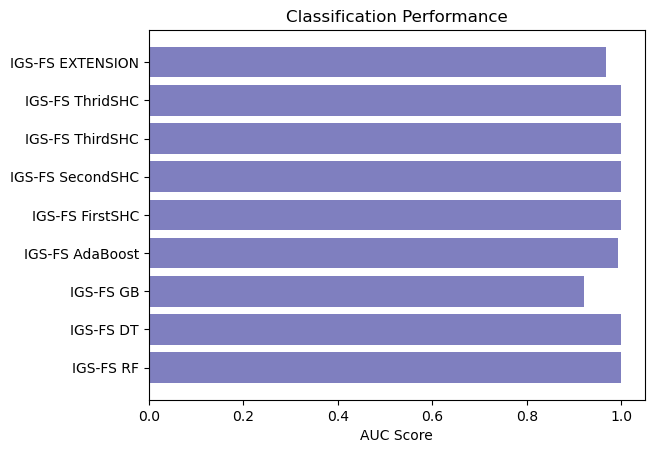

In [176]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

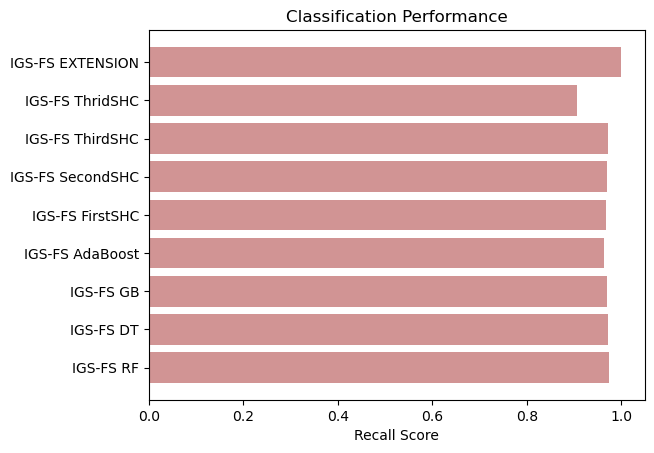

In [177]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# HRF FS

In [178]:
df = pd.read_csv('processed.csv')
del df['Unnamed: 0']
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,1,0
1,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,3,0
2,80,0,0,0,0,0,0,0,0,0,...,0.6,1,80.0,1,0.70,1,115.0,0,3,1
3,66,0,0,0,0,0,0,0,0,0,...,2.2,1,123.0,1,0.93,1,132.0,0,3,0
4,68,1,0,0,0,0,0,0,0,0,...,1.6,1,83.0,1,0.89,1,93.0,0,3,0


In [179]:
X = df.drop(["Class"],axis =1)
y = df["Class"]

In [180]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)

In [182]:
sel.fit(X)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [183]:
sum(sel.get_support())

22

In [184]:
len(X.columns[sel.get_support()])

22

In [185]:
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

6


['TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [186]:
X = df[['TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']]
y = df["Class"]

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2114, 6), (2114,), (529, 6), (529,))

In [188]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

# Random FOrest

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

In [190]:
storeResults('HRF-FS RF',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# DecisionTree

In [191]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [192]:
storeResults('HRF-FS DT',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc)

# GradientBoosting

In [193]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

gbm.fit(X_train, y_train)
y_pred    = gbm.predict(X_valid)

gbm_acc = accuracy_score(y_pred, y_valid)
gbm_prec = precision_score(y_pred, y_valid,average='weighted')
gbm_f1 = f1_score(y_pred, y_valid,average='weighted')
gbm_auroc = roc_auc_score(y_train, gbm.predict_proba(X_train)[:, 1])
gbm_rec = recall_score(y_pred, y_valid,average='weighted')

In [194]:
storeResults('HRF-FS GB',gbm_acc,gbm_prec,gbm_rec,gbm_f1,gbm_auroc)

# AdaBoost

In [195]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)
y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])
ada_rec = recall_score(y_pred, y_valid,average='weighted')

In [196]:
storeResults('HRF-FS AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# 3SHC

# First SHC

In [197]:
from sklearn.ensemble import VotingClassifier

fshc = VotingClassifier(estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)], voting='soft')
fshc.fit(X_train, y_train)
y_pred    = fshc.predict(X_valid)

fshc_acc = accuracy_score(y_pred, y_valid)
fshc_prec = precision_score(y_pred, y_valid,average='weighted')
fshc_f1 = f1_score(y_pred, y_valid,average='weighted')
fshc_auroc = roc_auc_score(y_train, fshc.predict_proba(X_train)[:, 1])
fshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [198]:
storeResults('HRF-FS FirstSHC',fshc_acc,fshc_prec,fshc_rec,fshc_f1,fshc_auroc)

# Second SHC

In [199]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sshc = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
sshc.fit(X_train, y_train)
y_pred    = sshc.predict(X_valid)

sshc_acc = accuracy_score(y_pred, y_valid)
sshc_prec = precision_score(y_pred, y_valid,average='weighted')
sshc_f1 = f1_score(y_pred, y_valid,average='weighted')
sshc_auroc = roc_auc_score(y_train, sshc.predict_proba(X_train)[:, 1])
sshc_rec = recall_score(y_pred, y_valid,average='weighted')

In [200]:
storeResults('HRF-FS SecondSHC',sshc_acc,sshc_prec,sshc_rec,sshc_f1,sshc_auroc)

# Third SHC

In [201]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

estimators=[('RF', rf),('DT', dt),('GB', gbm),('AdaBoost', ada)]

tsch = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

tsch.fit(X_train, y_train)
y_pred    = tsch.predict(X_valid)

tsch_acc = accuracy_score(y_pred, y_valid)
tsch_prec = precision_score(y_pred, y_valid,average='weighted')
tsch_f1 = f1_score(y_pred, y_valid,average='weighted')
tsch_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
tsch_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 163, number of negative: 1951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077105 -> initscore=-2.482347
[LightGBM] [Info] Start training from score -2.482347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [202]:
storeResults('HRF-FS ThridSHC',tsch_acc,tsch_prec,tsch_rec,tsch_f1,tsch_auroc)

# 3SHANN

In [204]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [205]:
ann.fit(X_train, y_train, batch_size = 2, epochs = 10,verbose = 0)

In [206]:
y_pred = ann.predict(X_valid)
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_pred, y_valid)
ann_prec = precision_score(y_pred, y_valid,average='weighted')
ann_f1 = f1_score(y_pred, y_valid,average='weighted')
ann_auroc = roc_auc_score(y_train, tsch.predict_proba(X_train)[:, 1])
ann_rec = recall_score(y_pred, y_valid,average='weighted')

17/17 [==============================] - 0s 1000us/step


In [207]:
storeResults('HRF-FS ThridSHC',ann_acc,ann_prec,ann_rec,ann_f1,ann_auroc)

# Extension

In [208]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators=[('ET', tree),('BoostedDT', bdt)], voting='soft')

In [209]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')
ext_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
ext_rec = recall_score(y_pred, y_valid,average='weighted')

In [210]:
storeResults('HRF-FS EXTENSION',ext_acc,ext_prec,ext_rec,ext_f1,ext_auroc)

# Comparison

In [211]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'F1_score' : f1score,
                       'AUC' : auc,
                       'Recall' : recall
                      }) 

In [212]:
result

,ML Model,Accuracy,Precision,F1_score,AUC,Recall
0,HRF-FS RF,0.907,1.0,0.951,0.5,0.907
1,HRF-FS DT,0.907,1.0,0.951,0.5,0.907
2,HRF-FS GB,0.907,1.0,0.951,0.5,0.907
3,HRF-FS AdaBoost,0.907,1.0,0.951,0.5,0.907
4,HRF-FS FirstSHC,0.907,1.0,0.951,0.5,0.907
5,HRF-FS SecondSHC,0.907,1.0,0.951,0.5,0.907
6,HRF-FS ThridSHC,0.907,1.0,0.951,0.5,0.907
7,HRF-FS ThridSHC,0.907,1.0,0.951,0.5,0.907
8,HRF-FS EXTENSION,0.907,1.0,0.951,0.5,0.907


# Graph

In [213]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

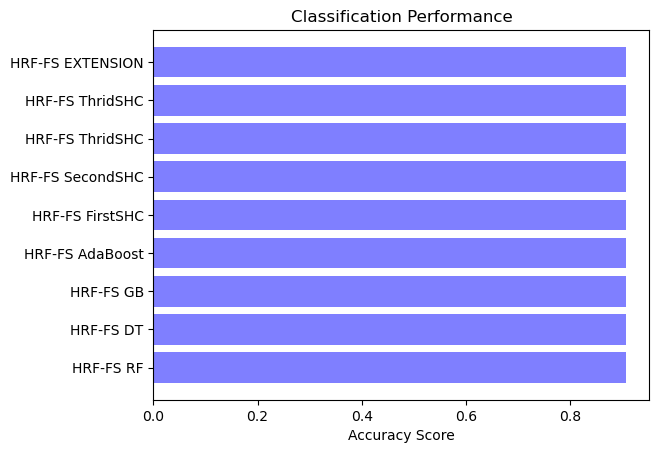

In [214]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

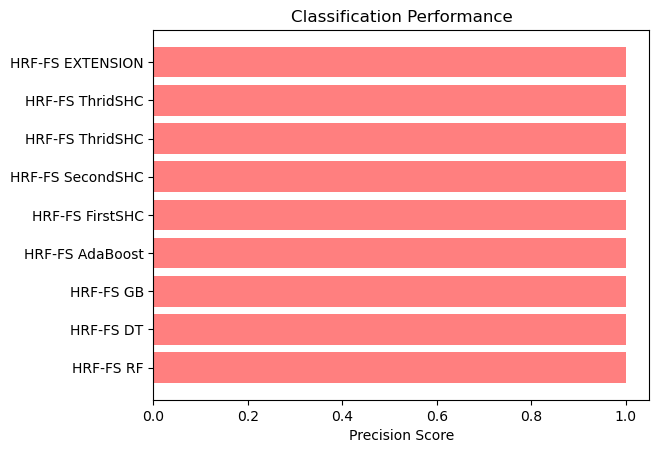

In [215]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

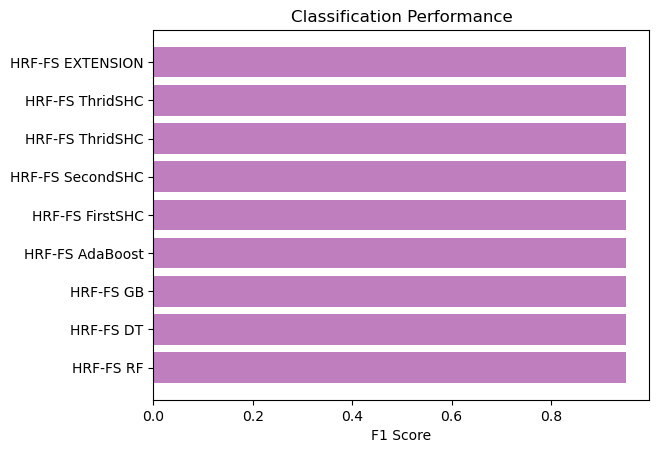

In [216]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC

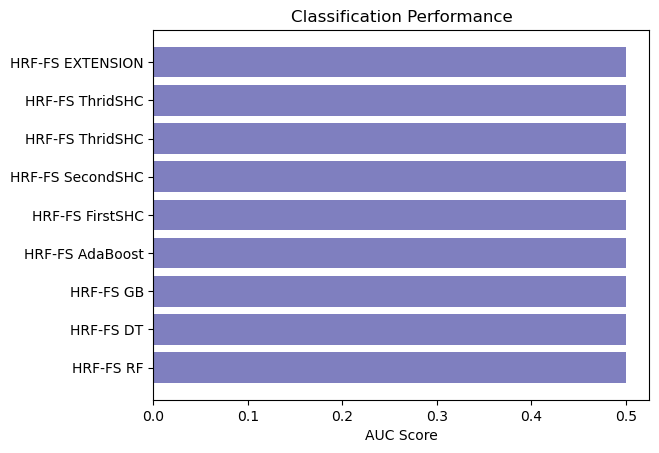

In [217]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

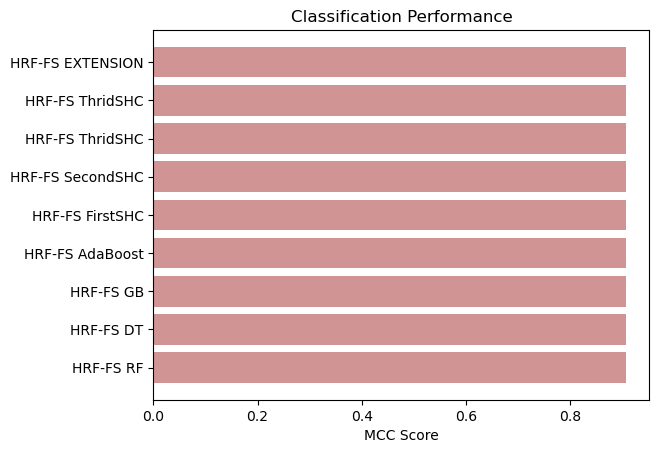

In [218]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()